<a href="https://colab.research.google.com/github/brunandrade/RedWineQuality/blob/master/RedWinesQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip uninstall tensorflow==2.0
!pip install tensorflow==1.14

In [0]:
!pip install -q seaborn

In [0]:
!pip install git+https://github.com/tensorflow/docs

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras import Sequential
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [6]:
#df=pd.read_csv('winequality-red.csv')
df = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Limpa espaços em branco
df.isna().sum() if (df.isna().sum()).any()>0 else "Base de dados Sem espaços em branco."

'Base de dados Sem espaços em branco.'

In [8]:
# Pega a média da coluna de qualidade
df['quality'].mean()

5.6360225140712945

In [0]:
# Retorna uma amostra aleatória de itens da base de dados.
# Parametro frac retorna uma amostra aleatória de 80% da base de dados.
# Seed para o gerador de números aleatórios.
train_dataset = df.sample(frac=0.8,random_state=0)

# Separa as datasets de treinamento da de teste.
test_dataset = df.drop(train_dataset.index)

In [0]:
# Remove a coluna de Qualidade em ambos datasets.
train_labels = train_dataset.pop('quality')
test_labels = test_dataset.pop('quality')

In [0]:
# Retorna uma cópia normalizada dos datasets.
normed_train_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)

In [0]:
# Criação de camadas da MLP]
# A quantidade de neurônios por camada está definida no incio do Dense;
# Função de ativação utilizada: RELU;
# Foram criadas 5 camadas: A primeira de entrada, Três ocultas e a última de Saída.
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

# Configura o Modelo para treinamento.
# Loss: mean squared error (erro quadrático médio);
# Metrics: mean absolute error (erro absoluto médio) 
# e mean squared error (erro quadrático médio)
  model.compile(loss='mse',optimizer='adam',metrics=['mae', 'mse'])
  return model

In [13]:
# Constrói o modelo.
model = build_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
# Printa de 100 em 100 Épocas os valores de perda, média de erro absoluto, média de erro quadrático.
history = model.fit(normed_train_data, train_labels,epochs=1000, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:23.2209,  mean_absolute_error:4.6933,  mean_squared_error:23.2209,  val_loss:8.9609,  val_mean_absolute_error:2.8696,  val_mean_squared_error:8.9609,  
....................................................................................................
Epoch: 100, loss:0.4607,  mean_absolute_error:0.5402,  mean_squared_error:0.4607,  val_loss:0.4986,  val_mean_absolute_error:0.5508,  val_mean_squared_error:0.4986,  
....................................................................................................
Epoch: 200, loss:0.3996,  mean_absolute_error:0.5022,  mean_squared_error:0.3996,  val_loss:0.4709,  val_mean_absolute_error:0.5245,  val_mean_squared_error:0.4709,  
....................................................................................................
Epoch: 300, loss:0.3873,  mean_absolute_error:0.4906,  mean_squared_error:0.3873,  val_loss:0.4634,  val_mean_absolute_error:0.5075,  val_mean_squared_error:0.4634,  
............................

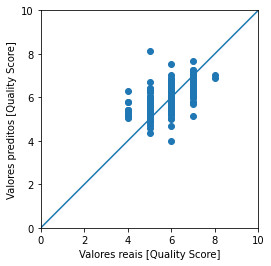

In [21]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('Valores reais [Quality Score]')
plt.ylabel('Valores preditos [Quality Score]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [22]:
test_predictions.min()

3.9925218

In [23]:
test_predictions.mean()

5.818587

In [24]:
test_predictions.max()

8.123411